[View in Colaboratory](https://colab.research.google.com/github/aeldemerdash/Hands-On-Machine-Learning-with-Scikit-Learn-and-TensorFlow/blob/master/Life_satisfaction_1.ipynb)

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving OECDBLI2017cleanedcsv.csv to OECDBLI2017cleanedcsv (1).csv
User uploaded file "OECDBLI2017cleanedcsv.csv" with length 5023 bytes


In [0]:
oecd_bli = pd.read_csv("OECDBLI2017cleanedcsv.csv", thousands=',')
country_life_sat = oecd_bli[['Country','Life satisfaction as avg score']]
country_life_sat.head()

,Country,Life satisfaction as avg score
0,Australia,7.3
1,Austria,7.0
2,Belgium,6.9
3,Canada,7.3
4,Chile,6.7


In [0]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving gdp_per_capita.csv to gdp_per_capita (1).csv
User uploaded file "gdp_per_capita.csv" with length 36323 bytes


In [0]:
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',')
country_gdp = gdp_per_capita[['STATE','gdp_per_capita']]
country_gdp.columns = ['Country', 'gdp_per_capita']
country_gdp.head()


,Country,gdp_per_capita
0,United States,26620
1,Alabama,21621
2,Alaska,44418
3,Arizona,23056
4,Arkansas,20389


In [0]:
frames = [country_gdp, country_life_sat]
#result = pd.concat(frames)
training= pd.concat([country_life_sat, country_gdp], axis=1, join='inner')
training.describe()

,Life satisfaction as avg score,gdp_per_capita
count,39.000000,39.000000
mean,6.528205,27831.410256
std,0.766039,10846.187076
min,4.800000,18416.000000
25%,5.900000,22556.500000
50%,6.600000,24902.000000
75%,7.250000,28772.000000
max,7.500000,84673.000000


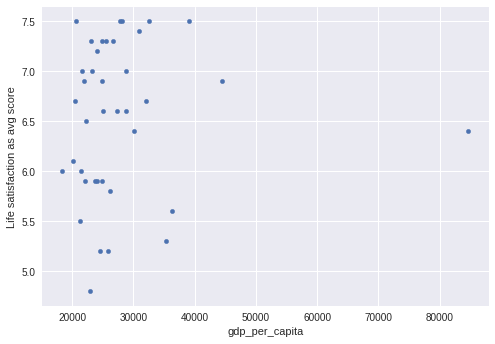

In [0]:
# Visualize the data
training.plot(kind='scatter', x="gdp_per_capita", y='Life satisfaction as avg score')
plt.show()

In [0]:
# Select a linear model
lin_reg_model = sklearn.linear_model.LinearRegression()

X = np.c_[training["gdp_per_capita"]]
Y = np.c_[training["Life satisfaction as avg score"]]
# Train the model
lin_reg_model.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
X_new = [[22587]] # Cyprus' GDP per capita
print(lin_reg_model.predict(X_new)) # outputs [[ 5.96242338]]

[[6.5060596]]
